In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [24]:
ndf = pd.read_excel("/home/omkar/Omkar Pawar/Data Science/KPMG Virtual Internship/Data/cleaned_new_customer_data.xlsx")


In [25]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Unnamed: 0                           1000 non-null   int64         
 1   gender                               1000 non-null   object        
 2   past_3_years_bike_related_purchases  1000 non-null   int64         
 3   DOB                                  1000 non-null   datetime64[ns]
 4   job_title                            1000 non-null   object        
 5   job_industry_category                1000 non-null   object        
 6   wealth_segment                       1000 non-null   object        
 7   deceased_indicator                   1000 non-null   object        
 8   owns_car                             1000 non-null   object        
 9   tenure                               1000 non-null   int64         
 10  address      

In [26]:
ndf.drop(labels="Unnamed: 0", inplace= True, axis= 1) # axis = 1 means column and 0 means row

In [27]:
ndf.head(3)

,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,full_name
0,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.71875,Chickie Brister
1,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.71875,Morly Genery
2,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.71875,Ardelis Forrester


### For Customer related visualization: 

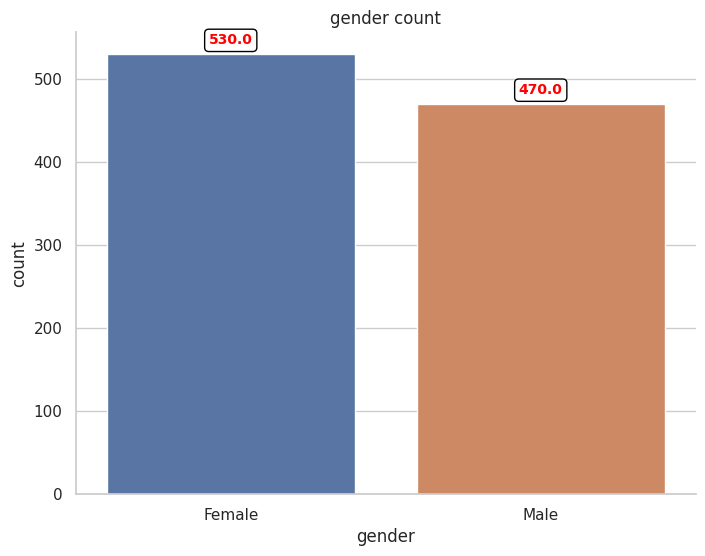

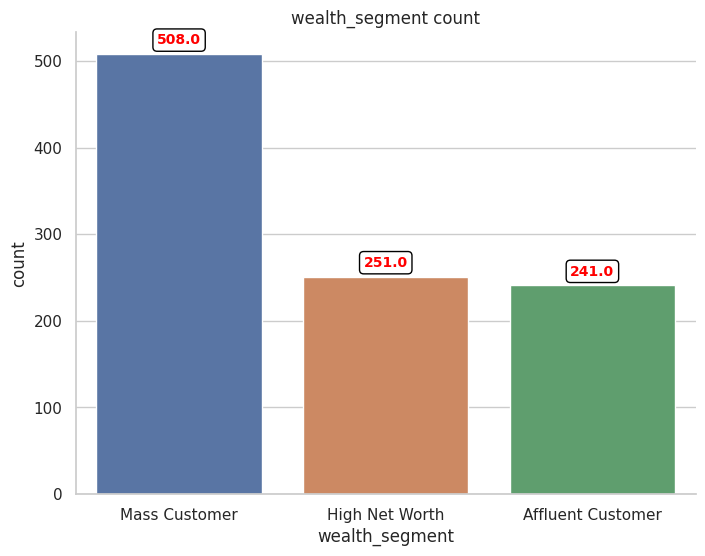

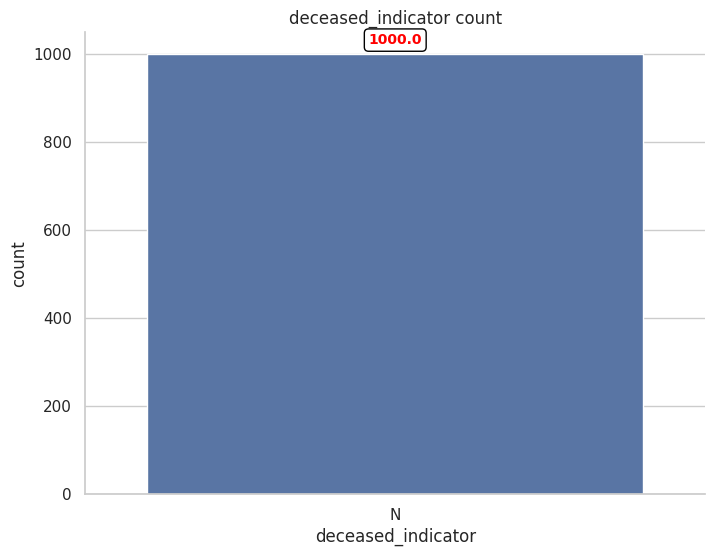

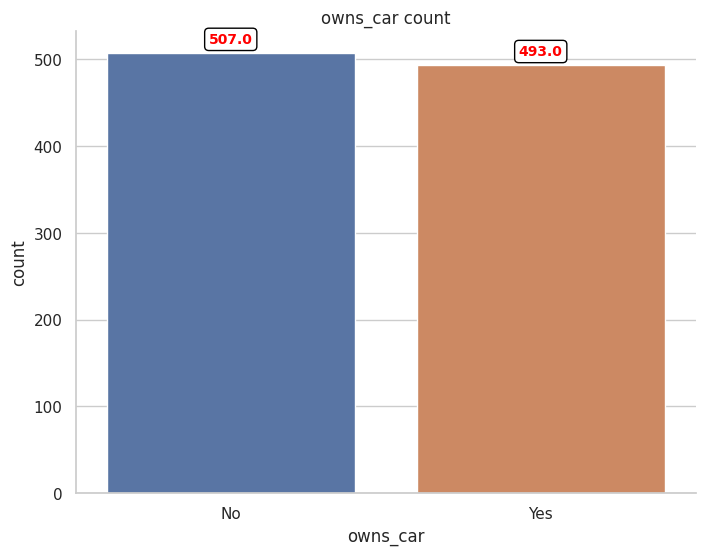

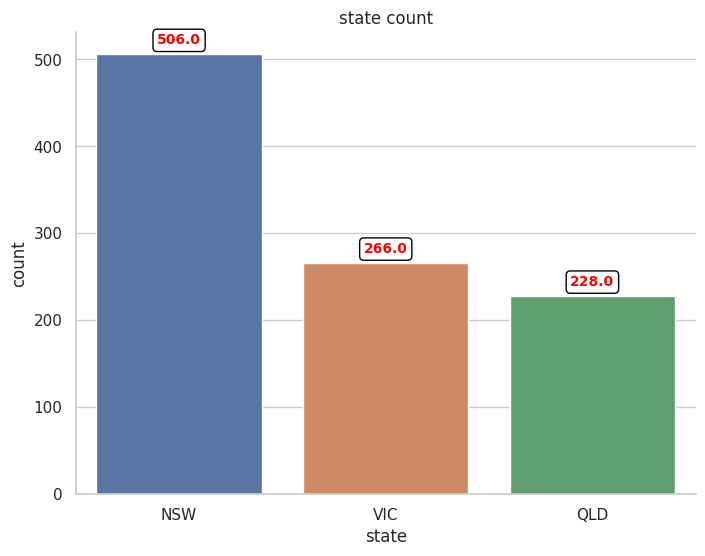

In [28]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical features
list_of_cat_features = ['gender', 'wealth_segment', 'deceased_indicator', 'owns_car', 'state']

# Function to create countplot for a categorical feature
def count_plot(cat_feature, data):
    # Set the size of the plot
    plt.figure(figsize=(8, 6))

    # Customize Seaborn settings
    sns.set_palette("pastel")  # Change the color palette
    sns.set(style="whitegrid")  # Add grid lines

    # Create a countplot using Seaborn
    ax = sns.countplot(x=cat_feature, data=data, order=data[cat_feature].value_counts().index)

    # Add count numbers on top of each bar
    for p in ax.patches:  # to iterate over each bar in the count plot
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points',
                    fontsize=10, color='red', weight='bold',
                    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

    # Remove the spines (borders) for a cleaner look
    sns.despine()

    # Add title to the plot
    plt.title(f'{cat_feature} count')

    # Display the plot
    plt.show()

# Loop through each categorical feature and create countplot
for cat_feature in list_of_cat_features:
    count_plot(cat_feature=cat_feature, data=ndf)


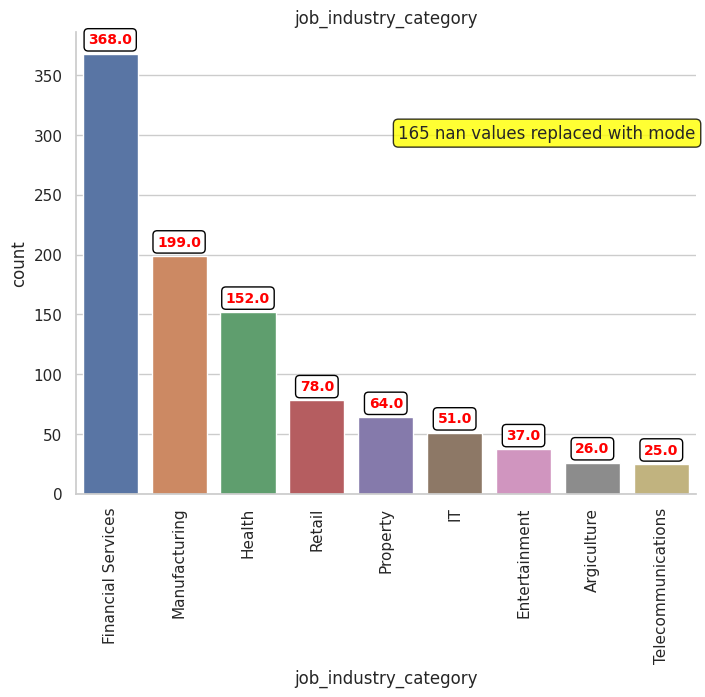

In [29]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Customize Seaborn settings
sns.set_palette("pastel")  # Change the color palette
sns.set(style="whitegrid")  # Add grid lines

# Create a countplot using Seaborn
ax = sns.countplot(x='job_industry_category', data=ndf, order=ndf['job_industry_category'].value_counts().index)

# Add count numbers on top of each bar
for p in ax.patches: # to iterate over each bar in the count plot
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', 
                fontsize=10, color='red', weight='bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))


plt.xticks(rotation= 90)
# Remove the spines (borders) for a cleaner look
sns.despine()

# Add a text box at the top-right corner
plt.text(1, 0.8, f'165 nan values replaced with mode', 
         transform=ax.transAxes, horizontalalignment='right', 
         verticalalignment='top', bbox=dict(facecolor='Yellow',
         edgecolor='black', boxstyle='round,pad=0.3', alpha=0.8))

# Add title to the plot
plt.title('job_industry_category')

# Display the plot
plt.show()

---

In [30]:
# calculating age using DOB:
import datetime as dt

ndf['DOB'] = pd.to_datetime(ndf['DOB'])
current_year = dt.datetime.now().year

ndf['age'] = current_year - ndf['DOB'].dt.year

print(ndf[['DOB', 'age']])

           DOB  age
0   1957-07-12   66
1   1970-03-22   53
2   1974-08-28   49
3   1979-01-28   44
4   1965-09-21   58
..         ...  ...
995 1959-10-07   64
996 2001-10-17   22
997 1954-10-05   69
998 1952-12-17   71
999 1955-10-02   68

[1000 rows x 2 columns]


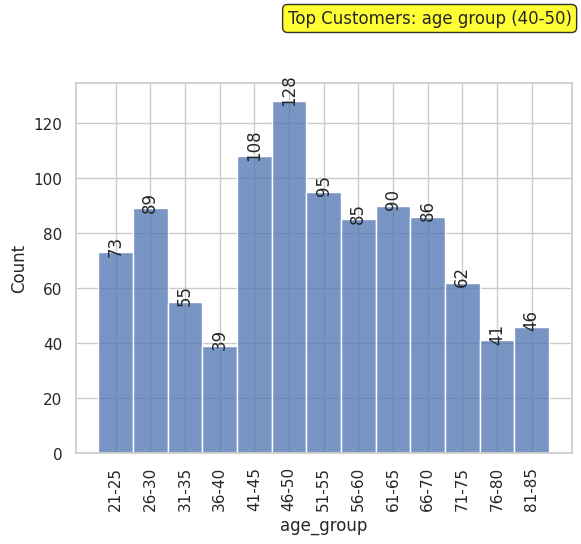

In [31]:
# Assuming 'ndf' is your DataFrame
min_age = ndf['age'].min()
max_age = ndf['age'].max()

# Calculate dynamic age bins
age_interval = 5
age_bins = range(min_age, max_age + age_interval + 1, age_interval)

# Create age ranges
ndf['age_group'] = pd.cut(ndf['age'], 
                                bins=age_bins, 
                                labels=[f'{start}-{end - 1}' for start, end in zip(age_bins[:-1], age_bins[1:])])

ax = sns.histplot(x='age_group', data=ndf, bins=len(age_bins) - 1)

# Annotate each bar with its count, rotating the numbers vertically
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', rotation='vertical')

# Rotate x-axis labels to 90 degrees
plt.xticks(rotation=90)
# Add a text box at the top-right corner
plt.text(1, 1.2, f'Top Customers: age group (40-50)', 
         transform=ax.transAxes, horizontalalignment='right', 
         verticalalignment='top', bbox=dict(facecolor='Yellow',
         edgecolor='black', boxstyle='round,pad=0.3', alpha=0.8))

plt.show()


----

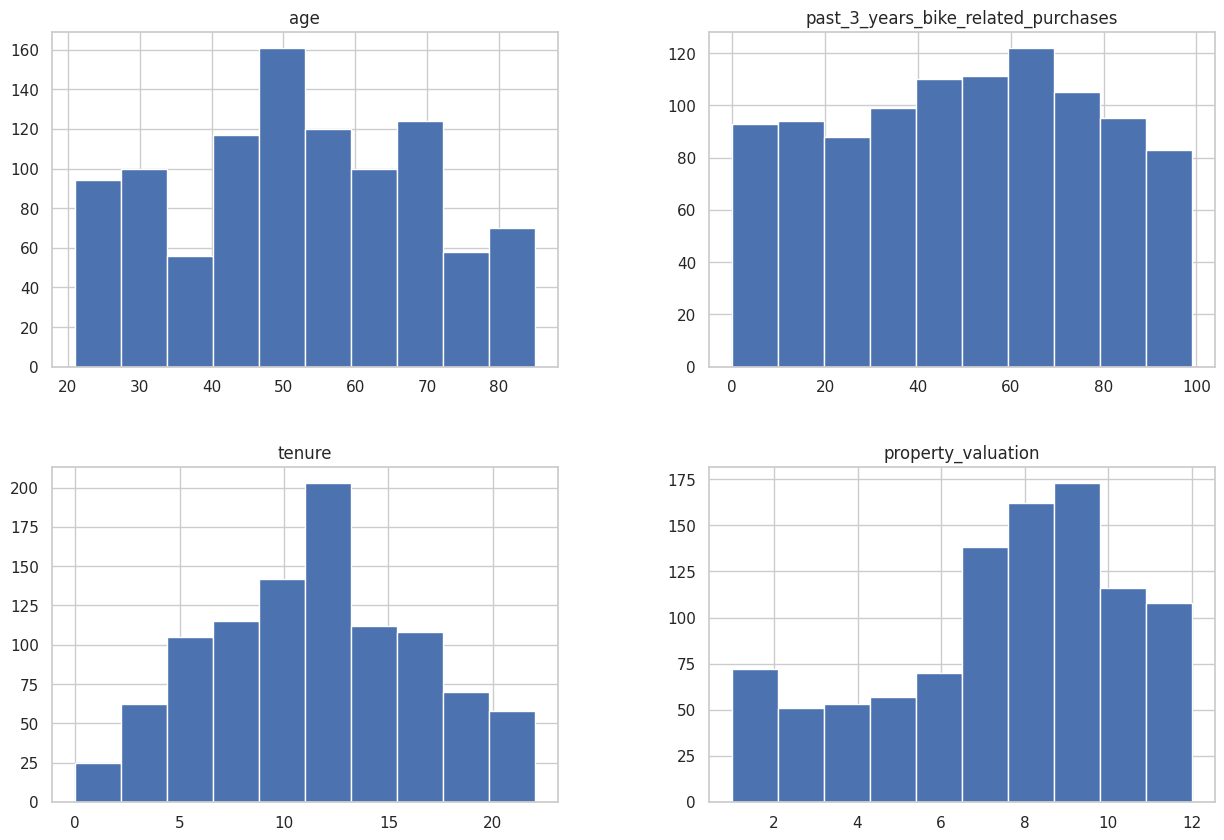

In [32]:
# plot numerical features data distribution:
import matplotlib.pyplot as plt
features_to_plot = ['age', 'past_3_years_bike_related_purchases', 'tenure', 'property_valuation']
ndf[features_to_plot].hist(bins=10, figsize=(15,10))
plt.show()

In [36]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   gender                               1000 non-null   object        
 1   past_3_years_bike_related_purchases  1000 non-null   int64         
 2   DOB                                  1000 non-null   datetime64[ns]
 3   job_title                            1000 non-null   object        
 4   job_industry_category                1000 non-null   object        
 5   wealth_segment                       1000 non-null   object        
 6   deceased_indicator                   1000 non-null   object        
 7   owns_car                             1000 non-null   object        
 8   tenure                               1000 non-null   int64         
 9   address                              1000 non-null   object        
 10  postcode     

In [33]:
numerical_features = ndf.columns[ndf.dtypes != 'object']
categorical_features = ndf.columns[ndf.dtypes == 'object']

print(f"Numerical columns: {numerical_columns} \n-----------\ncategorical columns: {categorical_columns}")

Numerical columns: Index(['past_3_years_bike_related_purchases', 'DOB', 'tenure', 'postcode',
       'property_valuation', 'Rank', 'Value'],
      dtype='object') 
-----------
categorical columns: Index(['gender', 'job_title', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car', 'address', 'state', 'country',
       'full_name'],
      dtype='object')


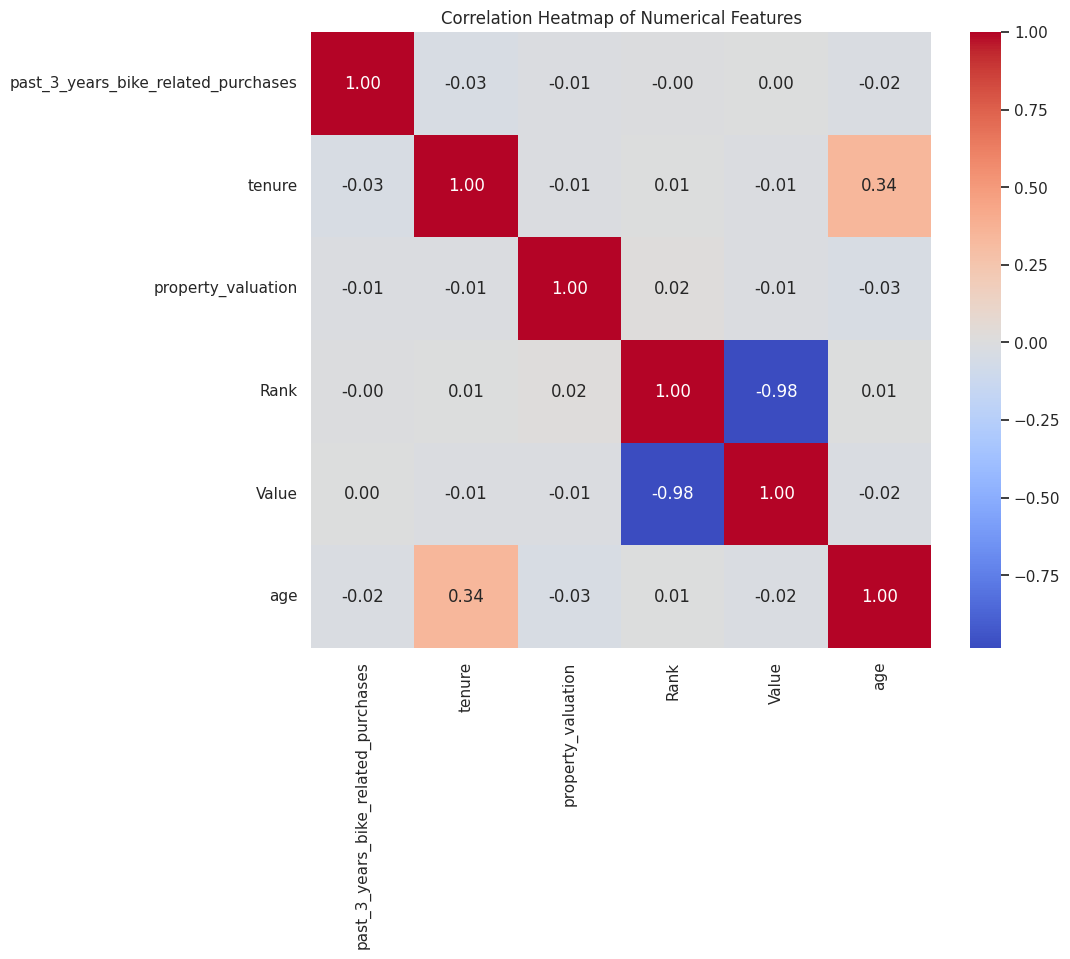

In [39]:
# Calculate correlation matrix

correlation_matrix = ndf[numerical_features.drop(labels=['age_group', 'postcode', 'DOB'])].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

- there is slight positive correlation between `age` and `tenure`. 

- There is strong negative correlation between `rank` and `value`. 